In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6746ba6b3c16e77145d6ee5dc11b8c1a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kracheh
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | baglung
Processing Record 4 of Set 1 | lukulu
Processing Record 5 of Set 1 | agutaya
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | valdosta
Processing Record 8 of Set 1 | aden
Processing Record 9 of Set 1 | honolulu
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | misratah
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | kupino
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | baykit
Processing Record 22 of Set 1 | san ramon
Processing Record 23 of Set 1 | ribeira grande
Processing Record 24 of Se

Processing Record 41 of Set 4 | bontang
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | vestmanna
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | ponta delgada
Processing Record 49 of Set 4 | gushikawa
Processing Record 50 of Set 4 | karpuninskiy
City not found. Skipping...
Processing Record 1 of Set 5 | oistins
Processing Record 2 of Set 5 | burnie
Processing Record 3 of Set 5 | pahrump
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | donji vakuf
Processing Record 6 of Set 5 | kokopo
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | stornoway
Processing Record 9 of Set 5 | goderich
Processing Record 10 of Set 5 | maulvi bazar
City not found. Skipping...
Processing Record 11 of Set 5 | primorsko-akhtarsk
Processing Record 12 of Set 5 | formos

Processing Record 26 of Set 8 | auki
Processing Record 27 of Set 8 | kulhudhuffushi
Processing Record 28 of Set 8 | faanui
Processing Record 29 of Set 8 | andenes
Processing Record 30 of Set 8 | pedernales
Processing Record 31 of Set 8 | kushima
Processing Record 32 of Set 8 | saint-louis
Processing Record 33 of Set 8 | ust-kuyga
Processing Record 34 of Set 8 | jacksonville beach
Processing Record 35 of Set 8 | tarakan
Processing Record 36 of Set 8 | sandnessjoen
Processing Record 37 of Set 8 | bereznehuvate
Processing Record 38 of Set 8 | bani
Processing Record 39 of Set 8 | vestmannaeyjar
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | winslow
Processing Record 44 of Set 8 | jaisalmer
Processing Record 45 of Set 8 | promyshlennaya
Processing Record 46 of Set 8 | ipatovo
Processing Record 47 of Set 8 | chokurdakh
Processing Record 48 of Set 8 | amderma
City not found. Skipping...


Processing Record 14 of Set 12 | juifang
City not found. Skipping...
Processing Record 15 of Set 12 | eydhafushi
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | calama
Processing Record 18 of Set 12 | qaqortoq
Processing Record 19 of Set 12 | belaya gora
Processing Record 20 of Set 12 | borazjan
Processing Record 21 of Set 12 | jumla
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | bandar-e lengeh
Processing Record 24 of Set 12 | ochakiv
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | samarai
Processing Record 27 of Set 12 | ouesso
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 12 | pimentel
Processing Record 31 of Set 12 | saint anthony
Processing Record 32 of Set 12 | kronach
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | tautira
Processing Record 35 of 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,48.20,69,75,35.57,CL,2020-12-02 20:10:46
1,Baglung,28.27,83.59,51.93,63,1,3.76,NP,2020-12-02 20:10:47
2,Lukulu,-14.37,23.24,68.04,90,83,2.95,ZM,2020-12-02 20:10:47
3,Agutaya,11.15,120.94,82.35,79,100,8.86,PH,2020-12-02 20:10:47
4,Hobart,-42.88,147.33,51.01,57,90,9.17,AU,2020-12-02 20:10:47
5,Valdosta,30.83,-83.28,57.99,28,1,6.11,US,2020-12-02 20:10:47
6,Aden,12.78,45.04,79.32,77,0,11.48,YE,2020-12-02 20:09:30
7,Honolulu,21.31,-157.86,78.01,69,20,4.70,US,2020-12-02 20:08:12
8,Paamiut,61.99,-49.67,22.86,74,17,14.29,GL,2020-12-02 20:10:48
9,Ilulissat,69.22,-51.10,10.40,66,40,23.04,GL,2020-12-02 20:08:00


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


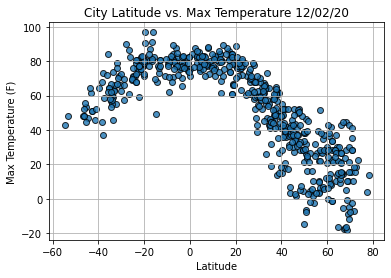

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

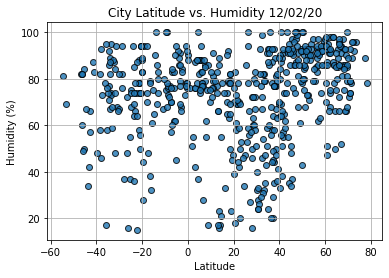

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

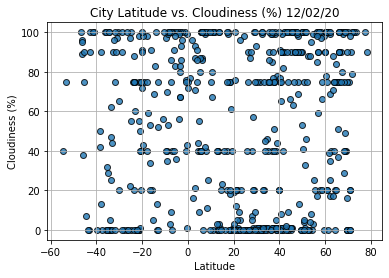

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


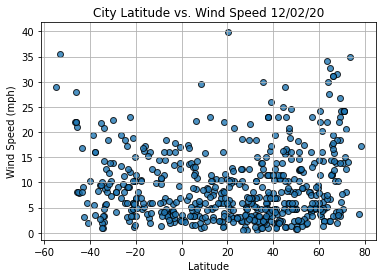

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Baglung,28.27,83.59,51.93,63,1,3.76,NP,2020-12-02 20:10:47
3,Agutaya,11.15,120.94,82.35,79,100,8.86,PH,2020-12-02 20:10:47
5,Valdosta,30.83,-83.28,57.99,28,1,6.11,US,2020-12-02 20:10:47
6,Aden,12.78,45.04,79.32,77,0,11.48,YE,2020-12-02 20:09:30
7,Honolulu,21.31,-157.86,78.01,69,20,4.70,US,2020-12-02 20:08:12


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

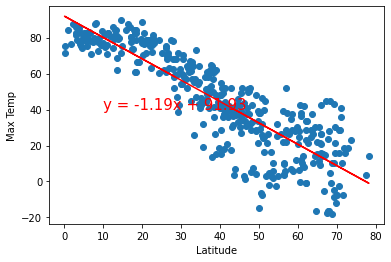

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

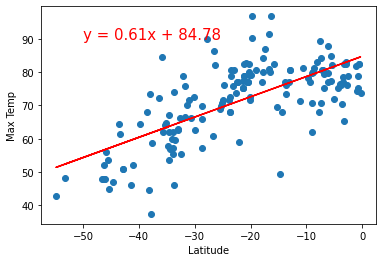

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

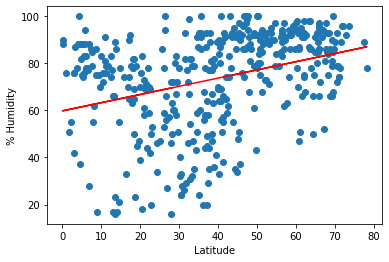

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

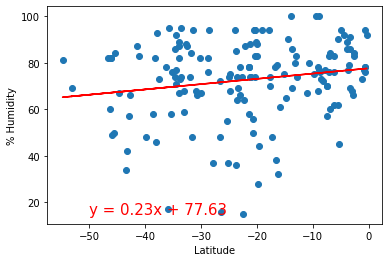

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

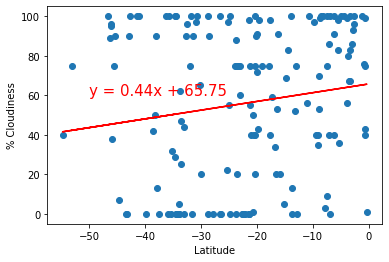

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

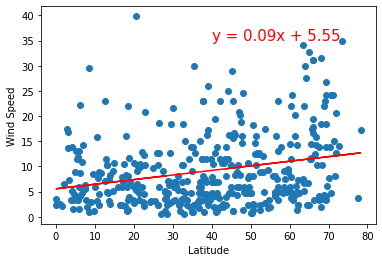

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

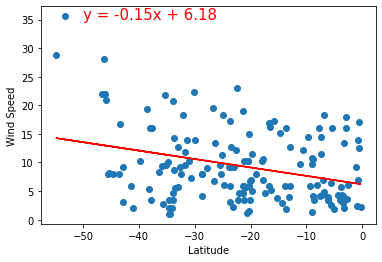

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
